# NBA Heat Map Generation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from nba_shots import draw_court # Existing python script to generate basketball court diagram.  Will need to acknowledge.

In [3]:
# Load dataset
df = pd.read_csv("dataset_clean2.csv")
df.head(10)

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,...,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,clock_total_seconds.y,clock_diff
0,158,PT01M51.00S,2024-11-13T00:34:48.300Z,1,REGULAR,3pt,Jump Shot,"fromturnover, fastbreak",1628369,68.676084,...,26,-116,242,1,1,20241112,BOS,ATL,111,0
1,140,PT03M13.00S,2024-11-13T00:29:37.200Z,1,REGULAR,2pt,Layup,pointsinthepaint,1626204,8.278581,...,2,16,25,1,1,20241112,BOS,ATL,193,0
2,135,PT03M37.00S,2024-11-13T00:29:05.800Z,1,REGULAR,2pt,Layup,pointsinthepaint,1630552,8.147175,...,4,40,24,1,1,20241112,BOS,ATL,217,0
3,110,PT05M17.00S,2024-11-13T00:24:29Z,1,REGULAR,2pt,Layup,"pointsinthepaint, fromturnover",1630700,8.360710,...,5,-50,26,1,1,20241112,BOS,ATL,317,0
4,86,PT06M37.00S,2024-11-13T00:22:01.400Z,1,REGULAR,2pt,DUNK,"pointsinthepaint, 2ndchance",1627759,93.511827,...,0,-1,8,1,1,20241112,BOS,ATL,397,0
5,77,PT07M02.00S,2024-11-13T00:18:36.500Z,1,REGULAR,2pt,Layup,pointsinthepaint,1642258,7.178055,...,2,-21,15,1,1,20241112,BOS,ATL,422,0
6,60,PT08M05.00S,2024-11-13T00:16:41.900Z,1,REGULAR,2pt,DUNK,pointsinthepaint,203991,6.915243,...,1,9,13,1,1,20241112,BOS,ATL,485,0
7,58,PT08M13.00S,2024-11-13T00:16:33.300Z,1,REGULAR,2pt,Layup,pointsinthepaint,1628401,94.431669,...,2,22,0,1,1,20241112,BOS,ATL,493,0
8,39,PT09M23.00S,2024-11-13T00:14:06Z,1,REGULAR,2pt,Layup,pointsinthepaint,1642258,6.915243,...,1,10,13,1,1,20241112,BOS,ATL,563,0
9,37,PT09M35.00S,2024-11-13T00:13:54Z,1,REGULAR,2pt,Layup,pointsinthepaint,1627759,92.986202,...,1,5,13,1,1,20241112,BOS,ATL,575,0


In [ ]:
img_court = plt.imread("nba_court.jpg") # Currently not used

## Heatmap

Using seaborn with square aggregation bins

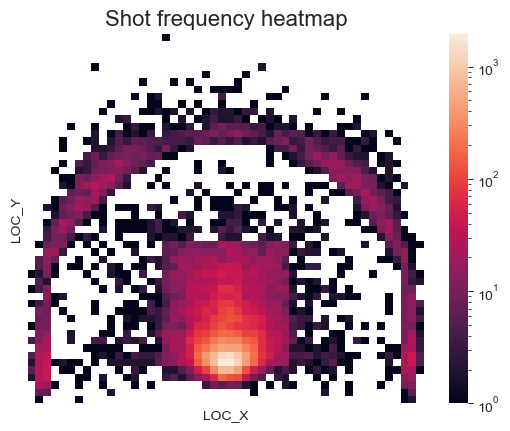

In [129]:
# Convert individual records into heatmap density based on shot count (frequency)
heatmap, xedges, yedges = np.histogram2d(df['LOC_X'], df['LOC_Y'], bins=50)

# Generate heat map
ax1 = sns.heatmap(heatmap.transpose(), cmap='rocket', norm=LogNorm())

# Seaborn inverts y axis for some reason - flip to return to original
ax1.invert_yaxis()

# Set title and labels
plt.title("Shot frequency heatmap", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.xlabel("LOC_X")
plt.ylabel("LOC_Y")

plt.show()

## Hex

Hexagonal shaped heatmap for comparison

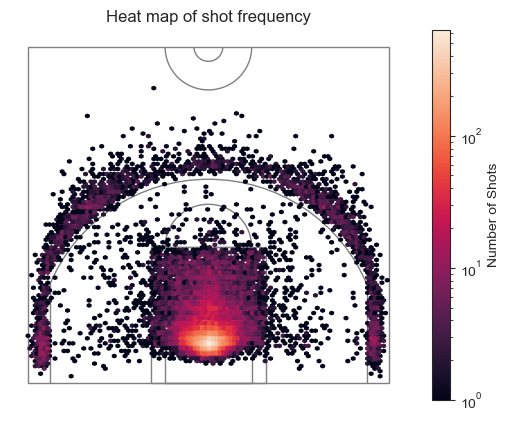

In [127]:
# generate heatmap
fig, ax2 = plt.subplots()

#ax.imshow(img_court, extent=[-300, 300, 0, 400])
ax2 = draw_court(outer_lines=True)
fig = ax2.hexbin(x=df['LOC_X'], y=df['LOC_Y'], cmap='rocket', bins="log")

# Set title & Axis Labels
#ax2.set_xticks([]) 
#ax2.set_yticks([])
ax2.set_axis_off()
plt.title("Heat map of shot frequency")
plt.colorbar(fig, label='Number of Shots')

plt.show()

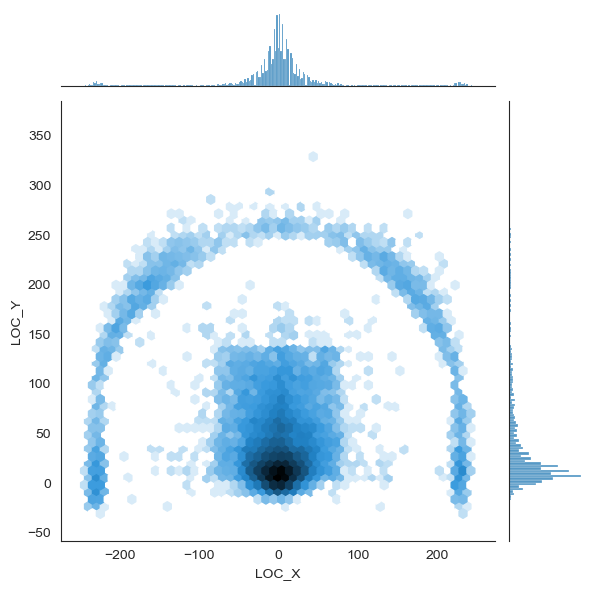

In [ ]:
# Seaborn hex with distribution
a = sns.jointplot(x=df['LOC_X'], y=df['LOC_Y'], kind='hex', bins="log")

# Using a background image not working yet, need to sort subplot axes
#a.ax_joint.imshow(img_court, extent=[-300,300, 0, 400])
#plt.title("Hexagonal heat map of show locations")

plt.show()

Text(0.5, 0.98, 'Shot Heatmap by quarter - All teams')

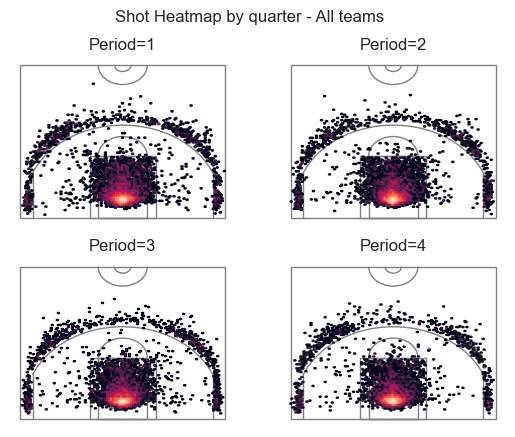

In [49]:
# Heat maps by period

df1 = df[df['period']==1]
df2 = df[df['period']==2]
df3 = df[df['period']==3]
df4 = df[df['period']==4]

fig3, axs= plt.subplots(2, 2)

for i, ax in enumerate(axs.flat):
    period = i + 1
    heatmap = df[df['period']==period]
    draw_court(ax=ax, outer_lines=True)
    ax.hexbin(x=heatmap['LOC_X'], y=heatmap['LOC_Y'], cmap='rocket', bins="log")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    ax.set_title(f"Period={period}")
    

plt.suptitle("Shot Heatmap by quarter - All teams")



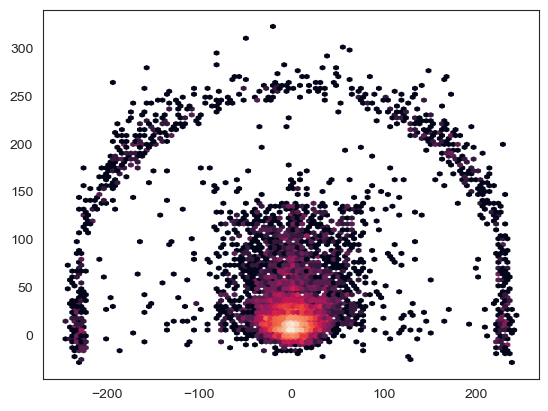

In [47]:

plt.hexbin(x=df3['LOC_X'], y=df3['LOC_Y'], cmap='rocket', bins="log")